**EJERCICIO 1 - Lectura y pasos previos**

In [1]:
#1. Leerlo como un dataframe (con la librería pandas) y llamarlo df_santander
import pandas as pd
df_santander = pd.read_csv('data_santander_red.csv')

In [2]:
#2. Observar los tipos de datos y cambiar “ind_viv_fin_ult1” a tipo float64 (astype(float)), ya que pretendemos usarlo en fases posteriores y se requiere que sea numérico.

# Cambiar la columna "ind_viv_fin_ult1" a tipo float64
df_santander['ind_viv_fin_ult1'] = df_santander['ind_viv_fin_ult1'].astype(float)

# Verificar el cambio de tipo de datos
df_santander.dtypes['ind_viv_fin_ult1']

dtype('float64')

In [3]:
#3. Tratar de responder a las siguientes preguntas de entendimiento inicial de los datos:

    #3.1 ¿Disponemos de un conjunto de datos suficientemente grande para nuestro objetivo?

El dataset tiene 100,000 filas y 49 columnas, lo que lo convierte en un conjunto de datos bastante grande para trabajar. Aunque hay algunos valores nulos, esta proporción no parece ser demasiado preocupante. Creo que este tamaño es adecuado para analizar y obtener resultados útiles para nuestro objetivo.

In [4]:
    #3.2 ¿Nos faltan variables que podrían ser interesantes?

Creo que el dataset es bastante completo para nuestro objetivo, pero faltan variables relacionadas con el comportamiento más específico de los clientes, como el uso de canales digitales o competencia. Esto podría ayudarnos a entender mejor por qué eligen ciertos productos.

In [5]:
    #3.3 ¿Existe alguna variable que no sepamos lo que significa?

En el dataset falta una variable que aparece en el diccionario, que es ind_plan_fin_ult1c, lo que podría deberse a un cambio en la estructura de los datos o a un error en la documentación, además, la primera columna del dataset, Unnamed: 0, no tiene nombre ni aparece en el diccionario, por lo que no sabemos a qué hace referencia,

In [6]:
    #3.4 ¿Alguna de las variables que tenemos tiene un tipo raro (ej: es de tipo String en vez de numérico)?

    # Revisar los tipos de datos del dataset
type_summary = df_santander.dtypes

# Identificar columnas que tienen un tipo object (pueden contener texto)
possible_issues = df_santander.select_dtypes(include=['object']).columns

# Mostrar las columnas que podrían tener un tipo raro
print("Columnas con tipo 'object':", possible_issues.tolist())



Columnas con tipo 'object': ['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'antiguedad', 'ult_fec_cli_1t', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']


Las variables age y antiguedad tienen un tipo de dato raro (texto en lugar de numérico) y las fechas deberían transformarse al tipo datetime. El resto de las variables categóricas (String) parecen correctas.

In [7]:
#4. Revisar el número de provincias que existen en los datos y compararlo con las provincias de España, ¿falta alguna? (df_santander['nomprov'].nunique())
# Contar el número de provincias únicas en el dataset
num_provinces_in_data = df_santander['nomprov'].nunique()

# Número total de provincias en España (50 provincias más Ceuta y Melilla)
total_provinces_spain = 52

# Comparar y determinar si faltan provincias
provinces_missing = total_provinces_spain - num_provinces_in_data

print("Número de provincias en el dataset:", num_provinces_in_data)
print("Provincias que faltan:", provinces_missing)


Número de provincias en el dataset: 52
Provincias que faltan: 0


In [8]:
#5. Ordena las provincias alfabéticamente y luego calcula los valores únicos (unique())
# Limpiar valores nulos de la columna 'nomprov' y ordenar las provincias alfabéticamente
provinces_sorted_unique = sorted(df_santander['nomprov'].dropna().unique())

# Mostrar las provincias ordenadas
print("Provincias ordenadas alfabéticamente:", provinces_sorted_unique)


Provincias ordenadas alfabéticamente: ['ALAVA', 'ALBACETE', 'ALICANTE', 'ALMERIA', 'ASTURIAS', 'AVILA', 'BADAJOZ', 'BALEARS, ILLES', 'BARCELONA', 'BIZKAIA', 'BURGOS', 'CACERES', 'CADIZ', 'CANTABRIA', 'CASTELLON', 'CEUTA', 'CIUDAD REAL', 'CORDOBA', 'CORUÑA, A', 'CUENCA', 'GIPUZKOA', 'GIRONA', 'GRANADA', 'GUADALAJARA', 'HUELVA', 'HUESCA', 'JAEN', 'LEON', 'LERIDA', 'LUGO', 'MADRID', 'MALAGA', 'MELILLA', 'MURCIA', 'NAVARRA', 'OURENSE', 'PALENCIA', 'PALMAS, LAS', 'PONTEVEDRA', 'RIOJA, LA', 'SALAMANCA', 'SANTA CRUZ DE TENERIFE', 'SEGOVIA', 'SEVILLA', 'SORIA', 'TARRAGONA', 'TERUEL', 'TOLEDO', 'VALENCIA', 'VALLADOLID', 'ZAMORA', 'ZARAGOZA']


In [9]:
#6. Revisa si los datos de los clientes que tenemos están homogéneamente distribuidos en España o se centran más en algunas provincias que en otras (value_counts())
# Contar los clientes por provincia y calcular su distribución
province_distribution = df_santander['nomprov'].value_counts(normalize=True) * 100

# Mostrar la distribución porcentual por provincia
print(province_distribution)

nomprov
MADRID                    16.237869
BARCELONA                 11.165866
SEVILLA                    5.301771
CORUÑA, A                  5.251383
MURCIA                     4.172083
PONTEVEDRA                 3.754875
MALAGA                     3.689371
CADIZ                      3.373946
VALENCIA                   3.210690
ZARAGOZA                   2.837823
BADAJOZ                    2.775342
ALICANTE                   2.382320
VALLADOLID                 2.211003
SALAMANCA                  2.114259
ASTURIAS                   1.980228
CACERES                    1.926817
CORDOBA                    1.834104
HUELVA                     1.704105
TOLEDO                     1.701081
PALMAS, LAS                1.580151
LUGO                       1.267749
CASTELLON                  1.263718
CIUDAD REAL                1.222400
ALBACETE                   1.212323
OURENSE                    1.145811
LERIDA                     1.126664
GIRONA                     1.114571
CANTABRIA           

In [10]:
#7. Identificar el formato del dataset.
# Ver las primeras filas del dataset
print(df_santander.head())

# Verificar información general del dataset
print(df_santander.info())


   Unnamed: 0  fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  \
0           0  2015-01-28   1375586            N              ES    H   35   
1           1  2015-01-28   1050611            N              ES    V   23   
2           2  2015-01-28   1050612            N              ES    V   23   
3           3  2015-01-28   1050613            N              ES    H   22   
4           4  2015-01-28   1050614            N              ES    V   23   

   fecha_alta  ind_nuevo antiguedad  ...  ind_hip_fin_ult1 ind_plan_fin_ult1  \
0  2015-01-12        0.0          6  ...                 0                 0   
1  2012-08-10        0.0         35  ...                 0                 0   
2  2012-08-10        0.0         35  ...                 0                 0   
3  2012-08-10        0.0         35  ...                 0                 0   
4  2012-08-10        0.0         35  ...                 0                 0   

   ind_pres_fin_ult1 ind_reca_fin_ult1 ind_tjcr_fi

El dataset tiene un formato tabular típico, con 49 columnas y 100,000 filas.


In [11]:
#8. Dividir la muestra de train (train_santander_red) y test (test_santander_red) en una proporción 70%-30% (train_test_split())
from sklearn.model_selection import train_test_split

# Dividir el dataset en train (70%) y test (30%)
train_santander_red, test_santander_red = train_test_split(df_santander, test_size=0.3, random_state=42)

# Verificar los tamaños de los conjuntos
print(len(train_santander_red), len(test_santander_red))

70000 30000


**EJERCICIO 2 - Limpieza y Analisis descriptivo**

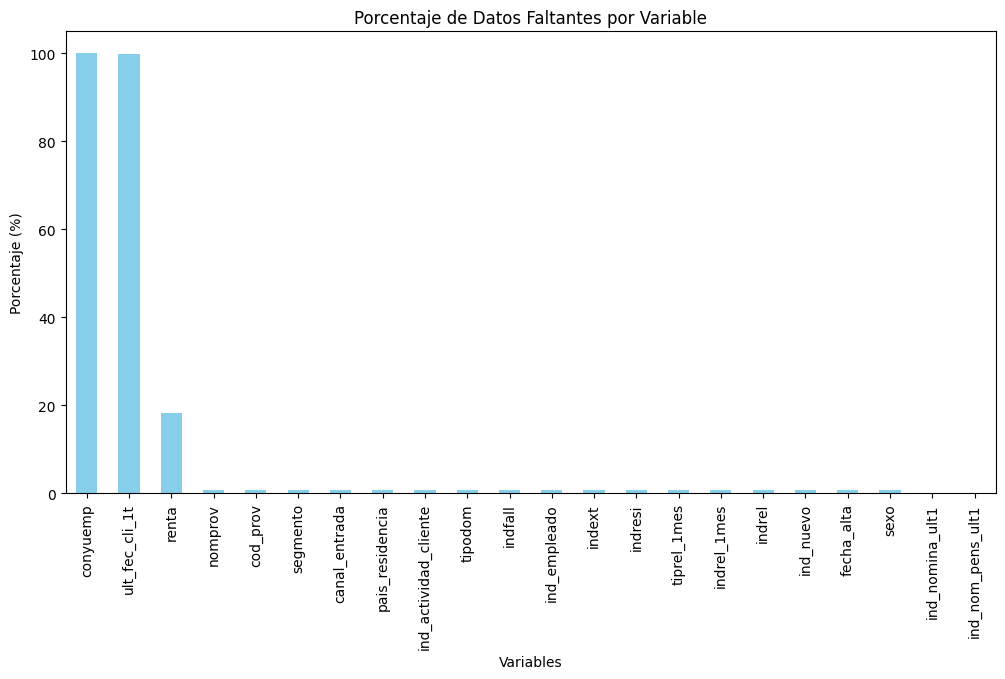

In [12]:
#9. Datos missing:

    #9.1 Observar si hay tipos de datos missing y graficarlos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Identificar las columnas con datos faltantes y su porcentaje
missing_data = df_santander.isnull().sum()
missing_percentage = (missing_data / len(df_santander)) * 100

# Configuración explícita para Google Colab
%matplotlib inline

# Graficar las columnas con datos faltantes
plt.figure(figsize=(12, 6))
missing_percentage[missing_percentage > 0].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Porcentaje de Datos Faltantes por Variable")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Variables")
plt.show()




In [13]:
    #9.2 Calcular el % que supone para cada variable y proponer varias soluciones para la variable “ind_nomina_ult1”: mean(), mode(),… (algoritmos)


# 1. Calcular el porcentaje de datos faltantes para todas las variables
missing_percentage_summary = (df_santander.isnull().sum() / len(df_santander)) * 100

# Imprimir el porcentaje de datos faltantes para todas las variables
print("Porcentaje de datos faltantes para cada variable:")
print(missing_percentage_summary[missing_percentage_summary > 0])

# 2. Focalizar en "ind_nomina_ult1"
# Calcular el porcentaje de datos faltantes específicamente para "ind_nomina_ult1"
ind_nomina_missing_percentage = missing_percentage_summary['ind_nomina_ult1']

# Calcular la media, la moda y la mediana de "ind_nomina_ult1"
ind_nomina_mean = df_santander['ind_nomina_ult1'].mean()
ind_nomina_mode = df_santander['ind_nomina_ult1'].mode()[0]
ind_nomina_median = df_santander['ind_nomina_ult1'].median()

# Mostrar los resultados
print("\nPorcentaje de datos faltantes en ind_nomina_ult1:", ind_nomina_missing_percentage)
print("Media de ind_nomina_ult1:", ind_nomina_mean)
print("Moda de ind_nomina_ult1:", ind_nomina_mode)
print("Mediana de ind_nomina_ult1:", ind_nomina_median)

# 3. Propuestas de imputación
# Sustituir los datos faltantes de "ind_nomina_ult1" con la mediana
df_santander['ind_nomina_ult1'] = df_santander['ind_nomina_ult1'].fillna(ind_nomina_median)

# Verificar y mostrar el número de datos faltantes tras la imputación
missing_after = df_santander['ind_nomina_ult1'].isnull().sum()
print(f"Número de datos faltantes tras incluir la mediana: {missing_after}")




Porcentaje de datos faltantes para cada variable:
ind_empleado               0.683
pais_residencia            0.683
sexo                       0.683
fecha_alta                 0.683
ind_nuevo                  0.683
indrel                     0.683
ult_fec_cli_1t            99.872
indrel_1mes                0.683
tiprel_1mes                0.683
indresi                    0.683
indext                     0.683
conyuemp                 100.000
canal_entrada              0.688
indfall                    0.683
tipodom                    0.683
cod_prov                   0.769
nomprov                    0.769
ind_actividad_cliente      0.683
renta                     18.284
segmento                   0.691
ind_nomina_ult1            0.210
ind_nom_pens_ult1          0.210
dtype: float64

Porcentaje de datos faltantes en ind_nomina_ult1: 0.21
Media de ind_nomina_ult1: 0.03293917226174967
Moda de ind_nomina_ult1: 0.0
Mediana de ind_nomina_ult1: 0.0
Número de datos faltantes tras incluir la medi

Para tratar los datos faltantes en la variable "ind_nomina_ult1" (nómina), considero que la mejor solución es rellenarlos con la mediana, ya que es más robusta frente a valores extremos y adecuada para datos financieros con posibles variaciones significativas.

También evaluamos otras opciones, como la media y la moda, pero la mediana se considera más adecuada para garantizar una representación central confiable en este caso.

In [14]:
    #9.3 Reemplazar para “age” y “antiguedad” el valor de NA (not available) por np.NaN. (replace())
import numpy as np

# Contar cuántos valores 'NA' hay en las columnas 'age' y 'antiguedad' antes del reemplazo
na_count_age_before = (df_santander['age'].str.strip() == 'NA').sum()
na_count_antiguedad_before = (df_santander['antiguedad'].str.strip() == 'NA').sum()

print(f"Valores 'NA' en 'age' antes del reemplazo: {na_count_age_before}")
print(f"Valores 'NA' en 'antiguedad' antes del reemplazo: {na_count_antiguedad_before}")

# Reemplazar valores 'NA' (considerando espacios) con np.NaN en las columnas correspondientes
df_santander['age'] = df_santander['age'].str.strip().replace('NA', np.NaN)
df_santander['antiguedad'] = df_santander['antiguedad'].str.strip().replace('NA', np.NaN)

# Contar cuántos valores faltantes (np.NaN) hay después del reemplazo
na_count_age_after = df_santander['age'].isnull().sum()
na_count_antiguedad_after = df_santander['antiguedad'].isnull().sum()

print(f"Valores faltantes en 'age' después del reemplazo: {na_count_age_after}")
print(f"Valores faltantes en 'antiguedad' después del reemplazo: {na_count_antiguedad_after}")

print("Se han modificado 683 NA por np.Nan")


Valores 'NA' en 'age' antes del reemplazo: 683
Valores 'NA' en 'antiguedad' antes del reemplazo: 683
Valores faltantes en 'age' después del reemplazo: 683
Valores faltantes en 'antiguedad' después del reemplazo: 683
Se han modificado 683 NA por np.Nan


In [15]:
    #9.4 Si hay alguna variable que esté completamente vacía eliminarla.
  # Identificar columnas completamente vacías
empty_columns = df_santander.columns[df_santander.isnull().all()]
columns_before = df_santander.shape[1]
# Eliminar las columnas completamente vacías
df_santander.drop(columns=empty_columns, inplace=True)
columns_after = df_santander.shape[1]
# Mostrar las columnas que fueron eliminadas
columns_removed = columns_before - columns_after
print("Columnas completamente vacías eliminadas:", empty_columns.tolist())
print("Número de columnas eliminadas:", columns_removed)


Columnas completamente vacías eliminadas: ['conyuemp']
Número de columnas eliminadas: 1


In [16]:
    #9.5 La variable “antiguedad” igual a 106 años interpretamos que es un error por lo que se debe transformar ese caso a dato no disponible (np.NaN)

print("Nota: El valor '106' no se encuentra presente en la columna antiguedad, está en la columna age, en la columna antiguedad tenemos el 157'.")

# Contar cuántos valores "106" existen antes de reemplazar en la columna "age"
age_106_count_before = (df_santander['age'] == '106').sum()
print(f"Valores '106' en 'age' antes del reemplazo: {age_106_count_before}")

# Reemplazar el valor "106" con np.NaN en la columna "age"
df_santander['age'] = df_santander['age'].replace('106', np.NaN)

# Contar cuántos valores faltantes (np.NaN) hay después del reemplazo en "age"
age_nan_count_after = df_santander['age'].isnull().sum()
print(f"Valores faltantes en 'age' después del reemplazo: {age_nan_count_after}")


# Contar cuántos valores "157" existen antes de reemplazar
antiguedad_157_count_before = (df_santander['antiguedad'] == '157').sum()
print(f"Valores '157' en 'antiguedad' antes del reemplazo: {antiguedad_157_count_before}")

# Reemplazar el valor "157" con np.NaN
df_santander['antiguedad'] = df_santander['antiguedad'].replace('157', np.NaN)

# Contar cuántos valores faltantes (np.NaN) hay después del reemplazo
antiguedad_nan_count_after = df_santander['antiguedad'].isnull().sum()
print(f"Valores faltantes en 'antiguedad' después del reemplazo: {antiguedad_nan_count_after}")


Nota: El valor '106' no se encuentra presente en la columna antiguedad, está en la columna age, en la columna antiguedad tenemos el 157'.
Valores '106' en 'age' antes del reemplazo: 1
Valores faltantes en 'age' después del reemplazo: 684
Valores '157' en 'antiguedad' antes del reemplazo: 1
Valores faltantes en 'antiguedad' después del reemplazo: 684


In [17]:
#10. Calcular la media, mediana, desviación estándar, rango, rango intercuartílico, coeficiente de asimetría y la curtosis para la “edad” y “renta” y explicar los resultados (describe()). En particular, explicar lo que observe sobre los niños de 4 años. Aplicar las operaciones a nivel de grupo y columna de la media para esas dos variables y saque una conclusión sobre el grupo de las mujeres.
# Convertir las columnas a tipo float para evitar errores
df_santander['age'] = pd.to_numeric(df_santander['age'], errors='coerce')
df_santander['renta'] = pd.to_numeric(df_santander['renta'], errors='coerce')

# Calcular los estadísticos
age_stats = {
    "Media": df_santander['age'].mean(),
    "Mediana": df_santander['age'].median(),
    "Desviación Estándar": df_santander['age'].std(),
    "Rango": df_santander['age'].max() - df_santander['age'].min(),
    "Rango Intercuartílico": df_santander['age'].quantile(0.75) - df_santander['age'].quantile(0.25),
    "Asimetría": df_santander['age'].skew(),
    "Curtosis": df_santander['age'].kurt()
}

renta_stats = {
    "Media": df_santander['renta'].mean(),
    "Mediana": df_santander['renta'].median(),
    "Desviación Estándar": df_santander['renta'].std(),
    "Rango": df_santander['renta'].max() - df_santander['renta'].min(),
    "Rango Intercuartílico": df_santander['renta'].quantile(0.75) - df_santander['renta'].quantile(0.25),
    "Asimetría": df_santander['renta'].skew(),
    "Curtosis": df_santander['renta'].kurt()
}

# Mostrar los resultados
print("Estadísticos Descriptivos para 'edad' y 'renta':\n")
print("Edad:")
print(f"  Media: {age_stats['Media']:.2f}")
print(f"  Mediana: {age_stats['Mediana']:.2f}")
print(f"  Desviación Estándar: {age_stats['Desviación Estándar']:.2f}")
print(f"  Rango: {age_stats['Rango']:.2f}")
print(f"  Rango Intercuartílico: {age_stats['Rango Intercuartílico']:.2f}")
print(f"  Asimetría: {age_stats['Asimetría']:.2f}")
print(f"  Curtosis: {age_stats['Curtosis']:.2f}")

print("\nRenta:")
print(f"  Media: {renta_stats['Media']:.2f}")
print(f"  Mediana: {renta_stats['Mediana']:.2f}")
print(f"  Desviación Estándar: {renta_stats['Desviación Estándar']:.2f}")
print(f"  Rango: {renta_stats['Rango']:.2f}")
print(f"  Rango Intercuartílico: {renta_stats['Rango Intercuartílico']:.2f}")
print(f"  Asimetría: {renta_stats['Asimetría']:.2f}")
print(f"  Curtosis: {renta_stats['Curtosis']:.2f}")

# Filtrar registros donde la edad es igual a 4
children_4_years = df_santander[df_santander['age'] == 4]

# Número total de niños de 4 años
num_children_4 = children_4_years.shape[0]
print(f"Número de niños de 4 años: {num_children_4}")

# Estadísticas descriptivas clave
print("\nEstadísticas clave para los niños de 4 años:")
print(children_4_years[['renta']].describe())

# Productos adquiridos por los niños (mostrar solo aquellos con valores > 0)
print("\nProductos adquiridos por los niños de 4 años:")
products_by_children_4 = children_4_years.iloc[:, 25:49].sum()
print(products_by_children_4[products_by_children_4 > 0])

# Agrupar los datos por sexo y calcular la media y mediana para edad y renta
grouped_stats = df_santander.groupby('sexo')[['age', 'renta']].agg(['mean', 'median'])

grouped_stats

# Agrupar los datos por sexo y calcular la media y mediana para edad y renta
grouped_stats = df_santander.groupby('sexo')[['age', 'renta']].agg(['mean', 'median'])

# Mostrar los resultados
print("Estadísticas agrupadas por sexo para edad y renta:")
print(grouped_stats)


Estadísticos Descriptivos para 'edad' y 'renta':

Edad:
  Media: 29.34
  Mediana: 25.00
  Desviación Estándar: 10.55
  Rango: 97.00
  Rango Intercuartílico: 8.00
  Asimetría: 2.29
  Curtosis: 6.39

Renta:
  Media: 115558.90
  Mediana: 89610.21
  Desviación Estándar: 159409.69
  Rango: 24250697.13
  Rango Intercuartílico: 70852.98
  Asimetría: 60.62
  Curtosis: 7427.03
Número de niños de 4 años: 26

Estadísticas clave para los niños de 4 años:
               renta
count      22.000000
mean   140262.882273
std     69674.868025
min     47499.630000
25%     91594.102500
50%    121578.885000
75%    166566.742500
max    283361.850000

Productos adquiridos por los niños de 4 años:
ind_ctju_fin_ult1    26.0
dtype: float64
Estadísticas agrupadas por sexo para edad y renta:
            age                 renta          
           mean median           mean    median
sexo                                           
H     28.418417   25.0  113130.111954  87379.35
V     30.419081   26.0  118333.03

**Edad**:
*   La media es de 29.34 años, y la mediana de 25.00 años indica que la mayoría de los clientes son jóvenes-adultos, aunque la distribución está sesgada hacia edades más altas (asimetría positiva de 2.29).
*   La desviación estándar (10.55) y el rango intercuartílico (8 años) sugieren que las edades están bastante concentradas en un rango estrecho, aunque hay valores extremos (rango de 97 años y curtosis de 6.39).

**Renta**:
*   La media es de 115,558.90 unidades monetarias, pero la mediana (89,610.21) revela que los ingresos están altamente sesgados hacia valores extremos (asimetría de 60.62). Esto se debe a la presencia de clientes con ingresos significativamente elevados.
*   La desviación estándar es alta (159,409.69), reflejando una dispersión considerable, y el rango intercuartílico (70,852.98) muestra que los ingresos del 50% central de los clientes están dentro de un rango más razonable.
*   La curtosis (7427.03) confirma la presencia de valores atípicos extremos, lo que resalta la gran variabilidad en los ingresos de los clientes.ç

**Niños de 4 años**

Hay 26 registros de niños de 4 años en el dataset, lo que resulta peculiar considerando que niños de esta edad normalmente no tendrían productos bancarios.
*   De los 26 niños, 22 tienen información sobre la renta, mientras que 4 tienen datos faltantes.
*   La renta promedio (media) de los niños es 140,262.88 unidades monetarias, con una mediana de aproximadamente 121,578.89, lo que sugiere una distribución razonablemente concentrada.
*   Sin embargo, la renta tiene una variación considerable (desviación estándar de 69,674.87) y un rango amplio (de 47,499.63 a 283,361.85).
*  La mayoría de los niños (50%) tienen rentas entre 91,594.10 y 166,566.74, lo que refleja una diversidad económica moderada.
*   Productos adquiridos: Todos tienen el producto ind_ctju_fin_ult1 (cuenta joven), probablemente gestionado por sus padres o tutores.

Los registros parecen reflejar cuentas destinadas a menores, con características consistentes pero valores como la renta asociados probablemente a los responsables legales.

**Agrupación por sexo**:

**Edad**

*   Las mujeres (V) tienen una edad promedio ligeramente mayor (30.42 años) que los hombres (28.42 años).
*   La mediana es similar: 26 años para mujeres y 25 años para hombres, lo que sugiere que las mujeres tienden a ser un poco mayores.

**Renta**

*   Las mujeres tienen una renta promedio ligeramente superior (118,333.03) frente a los hombres (113,130.11).

*   La mediana también es mayor en las mujeres (92,512.05) frente a los hombres (87,379.35), indicando que, en general, las mujeres del dataset tienen rentas un poco más altas.

Las mujeres en este dataset tienden a ser ligeramente mayores y a tener ingresos promedio y medianos más altos que los hombres. Estas diferencias podrían ser indicativas de un perfil laboral o financiero más estable en el grupo femenino.







In [18]:
#11 Revise si existe algún outlier. Para ello, calcular los percentiles 0.05 (Q1) y 0.95(Q3) utilizando la función quantile() de Pandas. Luego, calcular el (pseudo)rango intercuartílico (IQR) como la diferencia entre Q3 y Q1. Luego definir los límites inferior y superior para identificar outliers como 1.5 veces el IQR por debajo de Q1 y por encima de Q3. Finalmente, encontrar los outliers al seleccionar los valores que están por debajo del límite inferior o por encima del límite superior.

# Seleccionar las columnas "age" y "renta" para buscar outliers
columns_to_check = ['age', 'renta']

# Diccionario para almacenar resultados
outlier_results = {}

# Calcular los percentiles (Q1 = 0.05 y Q3 = 0.95) y el IQR
for column in columns_to_check:
    Q1 = df_santander[column].quantile(0.05)
    Q3 = df_santander[column].quantile(0.95)
    IQR = Q3 - Q1

    # Límites inferior y superior para detectar outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Identificar los outliers
    outliers = df_santander[(df_santander[column] < lower_limit) | (df_santander[column] > upper_limit)]

    # Guardar los resultados
    outlier_results[column] = {
        'Q1 (5%)': Q1,
        'Q3 (95%)': Q3,
        'IQR': IQR,
        'Lower Limit': lower_limit,
        'Upper Limit': upper_limit,
        'Number of Outliers': outliers.shape[0],
        'Outliers': outliers[[column]]
    }

# Mostrar resultados para cada columna
for column, results in outlier_results.items():
    print(f"\nResultados para {column}:")
    print(f"Q1 (5%): {results['Q1 (5%)']}")
    print(f"Q3 (95%): {results['Q3 (95%)']}")
    print(f"IQR: {results['IQR']}")
    print(f"Lower Limit: {results['Lower Limit']}")
    print(f"Upper Limit: {results['Upper Limit']}")
    print(f"Number of Outliers: {results['Number of Outliers']}")





Resultados para age:
Q1 (5%): 22.0
Q3 (95%): 52.0
IQR: 30.0
Lower Limit: -23.0
Upper Limit: 97.0
Number of Outliers: 10

Resultados para renta:
Q1 (5%): 36744.30750000001
Q3 (95%): 261847.67250000002
IQR: 225103.365
Lower Limit: -300910.74
Upper Limit: 599502.72
Number of Outliers: 500


**EJERCICIO 3 - Visualización y Otros**

In [19]:
#12. Mediante análisis de correlaciones, identificar si la edad es un factor que permite identificar si una persona va a comprar un producto o no.
# Seleccionar las columnas relacionadas con productos (ind_*_ult1)
product_columns = [col for col in df_santander.columns if col.startswith('ind_') and col.endswith('_ult1')]

# Calcular la correlación de "age" con cada columna de productos
correlations = df_santander[product_columns + ['age']].corr()['age'].drop('age')

# Ordenar las correlaciones por magnitud para facilitar la interpretación
correlations = correlations.sort_values(ascending=False)

# Mostrar las correlaciones
print("Correlación de la edad con la compra de productos:")
print(correlations)


Correlación de la edad con la compra de productos:
ind_ecue_fin_ult1    0.357102
ind_dela_fin_ult1    0.304084
ind_recibo_ult1      0.209935
ind_ctma_fin_ult1    0.182091
ind_cno_fin_ult1     0.168786
ind_tjcr_fin_ult1    0.164915
ind_nom_pens_ult1    0.164735
ind_reca_fin_ult1    0.141096
ind_nomina_ult1      0.138711
ind_fond_fin_ult1    0.115199
ind_valo_fin_ult1    0.091990
ind_plan_fin_ult1    0.056109
ind_deme_fin_ult1    0.029902
ind_deco_fin_ult1    0.019706
ind_ctpp_fin_ult1    0.012234
ind_cder_fin_ult1    0.011078
ind_ctop_fin_ult1    0.010987
ind_hip_fin_ult1     0.008640
ind_viv_fin_ult1     0.008224
ind_pres_fin_ult1    0.005832
ind_ctju_fin_ult1   -0.168342
ind_cco_fin_ult1    -0.215024
ind_ahor_fin_ult1         NaN
ind_aval_fin_ult1         NaN
Name: age, dtype: float64


**Análisis de las correlaciones entre edad y compra de productos**


Productos con correlación positiva significativa:
*   e-account (ind_ecue_fin_ult1): Correlación más alta (0.357), seguido por Long-term deposits (0.304) y Direct Debit (0.290), indicando que estos productos son más comunes en personas mayores.
*   Productos como Pensions también tienen correlaciones moderadas, relacionadas con clientes mayores.

Productos con correlación negativa:
*   Current Accounts (ind_cco_fin_ult1): Correlación negativa (-0.215), lo que sugiere que son más comunes entre personas jóvenes.
*   Junior Account también muestra correlación negativa, como se espera por su naturaleza.

Conclusión:
*   La edad influye en la probabilidad de adquirir ciertos productos, siendo más relevante para depósitos a largo plazo y pensiones. Sin embargo, para otros productos, como cuentas corrientes, la edad juega un papel inverso o nulo.









Matriz de correlaciones entre productos:
                   ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  \
ind_ahor_fin_ult1                NaN                NaN               NaN   
ind_aval_fin_ult1                NaN                NaN               NaN   
ind_cco_fin_ult1                 NaN                NaN          1.000000   
ind_cder_fin_ult1                NaN                NaN         -0.003279   
ind_cno_fin_ult1                 NaN                NaN         -0.688856   

                   ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  \
ind_ahor_fin_ult1                NaN               NaN                NaN   
ind_aval_fin_ult1                NaN               NaN                NaN   
ind_cco_fin_ult1           -0.003279         -0.688856          -0.297516   
ind_cder_fin_ult1           1.000000          0.005495          -0.000616   
ind_cno_fin_ult1            0.005495          1.000000          -0.023232   

                   ind_ctma_fin_u

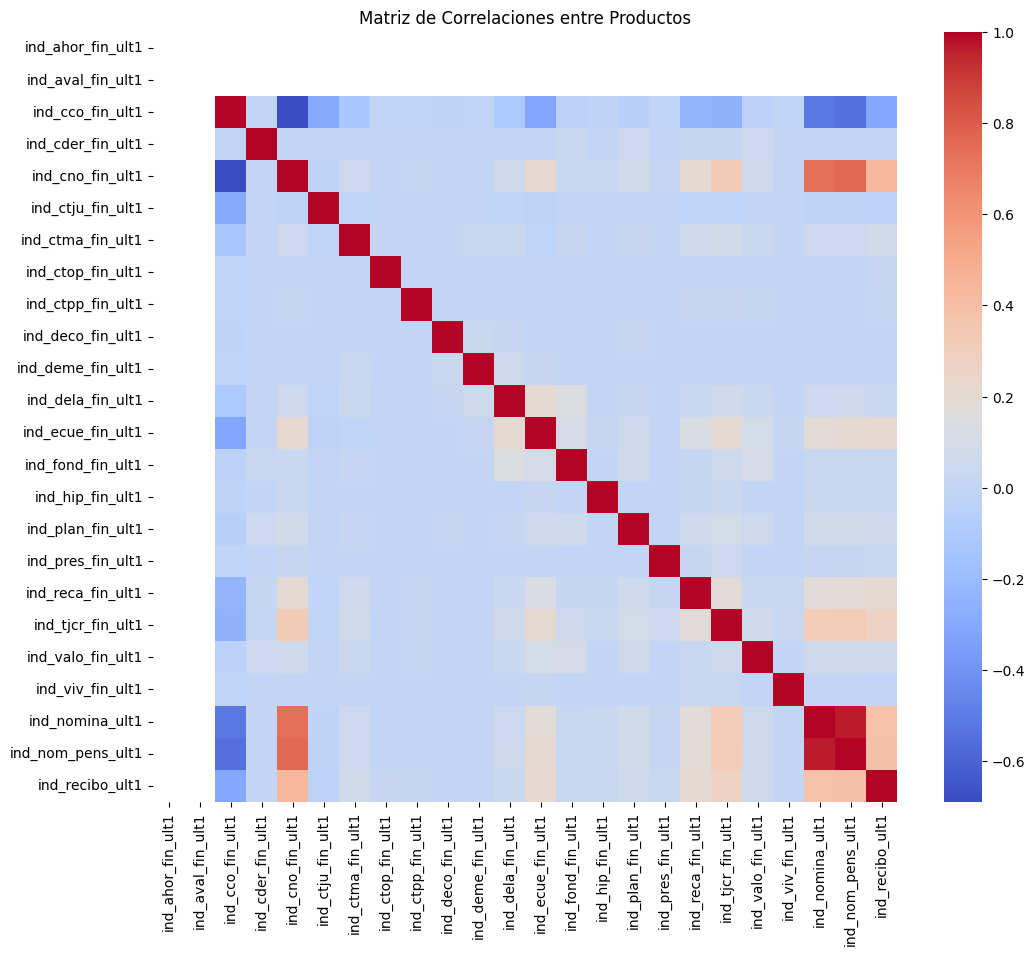

In [20]:
#13. A continuación, hacer una matriz de correlaciones para entender cómo se correlaciona cada producto con el resto.
# Seleccionar las columnas relacionadas con los productos financieros
product_columns = [col for col in df_santander.columns if col.startswith('ind_') and col.endswith('_ult1')]

# Crear la matriz de correlaciones
correlation_matrix = df_santander[product_columns].corr()

# Mostrar las primeras filas de la matriz de correlaciones
print("Matriz de correlaciones entre productos:")
print(correlation_matrix.head())

# Opcional: visualizar la matriz con un mapa de calor
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlaciones entre Productos')
plt.show()


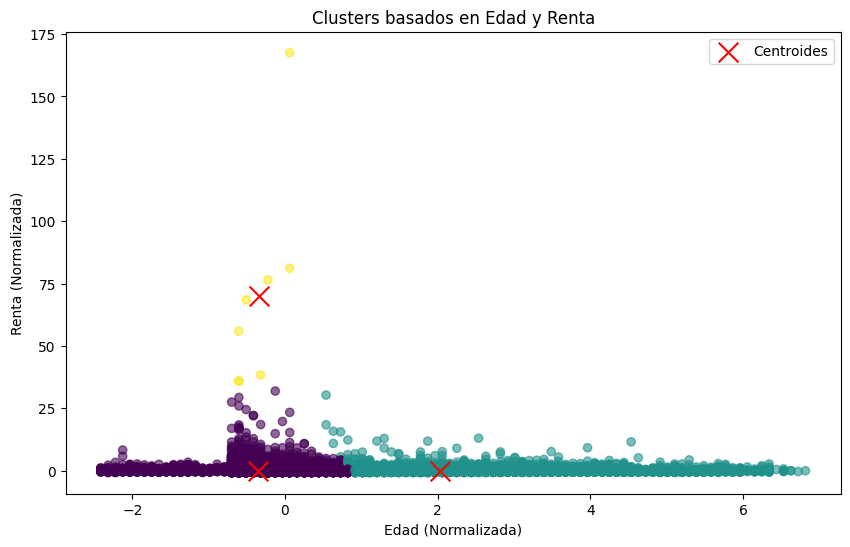

Distribución de registros por cluster:
cluster
0    85369
1    14623
2        8
Name: count, dtype: int64


In [21]:
#14. Realizar un análisis cluster sobre las variables de “age” y “renta”. Verifique que para “age” primero debe de convertir la variable a float. Dado que hay missing impute el valor medio para cada variable. Después graficarlo y obtener conclusiones.
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Asegurar que "age" y "renta" sean numéricos
df_santander['age'] = pd.to_numeric(df_santander['age'], errors='coerce')
df_santander['renta'] = pd.to_numeric(df_santander['renta'], errors='coerce')

# Imputar los valores faltantes con la media para "age" y "renta"
df_santander['age'] = df_santander['age'].fillna(df_santander['age'].mean())
df_santander['renta'] = df_santander['renta'].fillna(df_santander['renta'].mean())


# Seleccionar las variables para el clustering
X = df_santander[['age', 'renta']]

# Normalizar los datos para evitar sesgo por escalas diferentes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar el análisis de clustering con K-Means (3 clusters como ejemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Obtener las etiquetas de los clusters
df_santander['cluster'] = kmeans.labels_

# Graficar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=200, label='Centroides')
plt.title('Clusters basados en Edad y Renta')
plt.xlabel('Edad (Normalizada)')
plt.ylabel('Renta (Normalizada)')
plt.legend()
plt.show()

# Mostrar un resumen de los clusters
print("Distribución de registros por cluster:")
print(df_santander['cluster'].value_counts())


**CONCLUSIONES DEL ANALISIS DE CLUSTERING**


1.   Distribución de clusters:
*   Cluster 0 (púrpura): Representa la mayoría de los clientes (85,369), generalmente jóvenes o de edad media con rentas bajas o promedio.
*   Cluster 1 (verde): Incluye 14,623 clientes, típicamente adultos con rentas moderadas.
*   Cluster 2 (amarillo): Solo 8 clientes con rentas excepcionalmente altas (outliers).

2.   Patrones principales:
*   Los clientes con rentas más altas suelen ser mayores (clusters 1 y 2)
*   Los clientes jóvenes o de edad media suelen tener rentas más bajas (cluster 0).

3.   Conclusión:   
*   La segmentación identifica grupos bien definidos que pueden usarse para estrategias personalizadas, destacando un grupo de clientes atípicos (cluster 2) con gran poder adquisitivo.





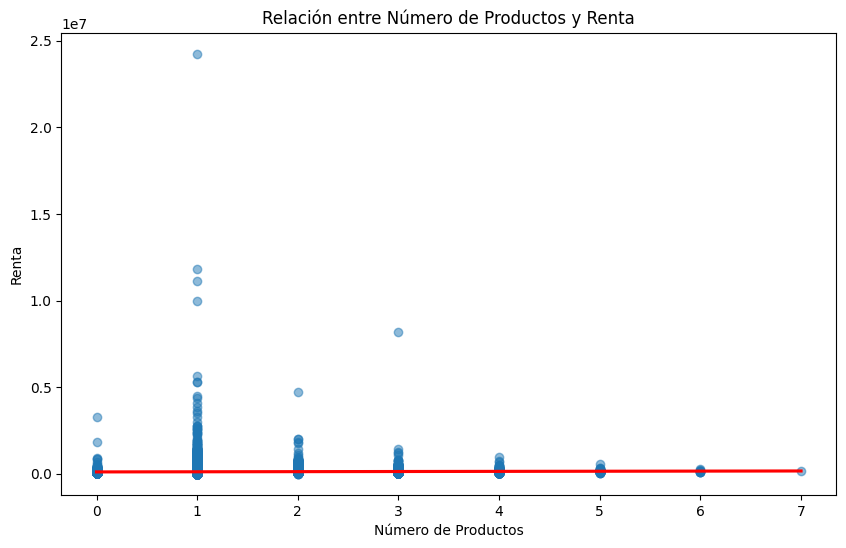

In [22]:
#15. Cree la variable “numero_productos” como la suma de todos los productos que consume la persona: A continuación, usando el paquete seaborn y las variables “renta” y “numero_productos” realizar un gráfico de puntos con regresión lineal. ¿Qué se puede apreciar?
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la variable "numero_productos" como la suma de todos los productos
cols = [
    "ind_tjcr_fin_ult1", "ind_reca_fin_ult1", "ind_pres_fin_ult1", "ind_plan_fin_ult1",
    "ind_hip_fin_ult1", "ind_fond_fin_ult1", "ind_ecue_fin_ult1", "ind_dela_fin_ult1",
    "ind_deme_fin_ult1", "ind_deco_fin_ult1", "ind_ctpp_fin_ult1", "ind_ctop_fin_ult1",
    "ind_ctma_fin_ult1", "ind_ctju_fin_ult1", "ind_cno_fin_ult1", "ind_cder_fin_ult1",
    "ind_cco_fin_ult1"
]

df_santander['numero_productos'] = df_santander[cols].sum(axis=1)

# Crear un gráfico de puntos con regresión lineal entre "renta" y "numero_productos"
plt.figure(figsize=(10, 6))
sns.regplot(x='numero_productos', y='renta', data=df_santander, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Relación entre Número de Productos y Renta')
plt.xlabel('Número de Productos')
plt.ylabel('Renta')
plt.show()



**CONCLUSIONES DEL ANALISIS DE CLUSTERING**

1.   Relación entre número de productos y renta:
*   La línea de regresión es prácticamente plana, lo que indica que no existe una relación clara entre el número de productos que un cliente consume y su nivel de renta.
*   Esto sugiere que, independientemente de la renta, los clientes tienden a consumir un número similar de productos financieros.

2.   Distribución de los datos:
*   La mayoría de los clientes tienen entre 0 y 3 productos, con una mayor concentración en 1 producto.
*   Hay pocos clientes con más de 3 productos, y son extremadamente raros los clientes con 6 o 7 productos.

3.   Clientes con rentas atípicas:  
*   Existen algunos puntos aislados con rentas muy altas (outliers). Estos clientes no parecen consumir más productos a pesar de sus ingresos elevados.

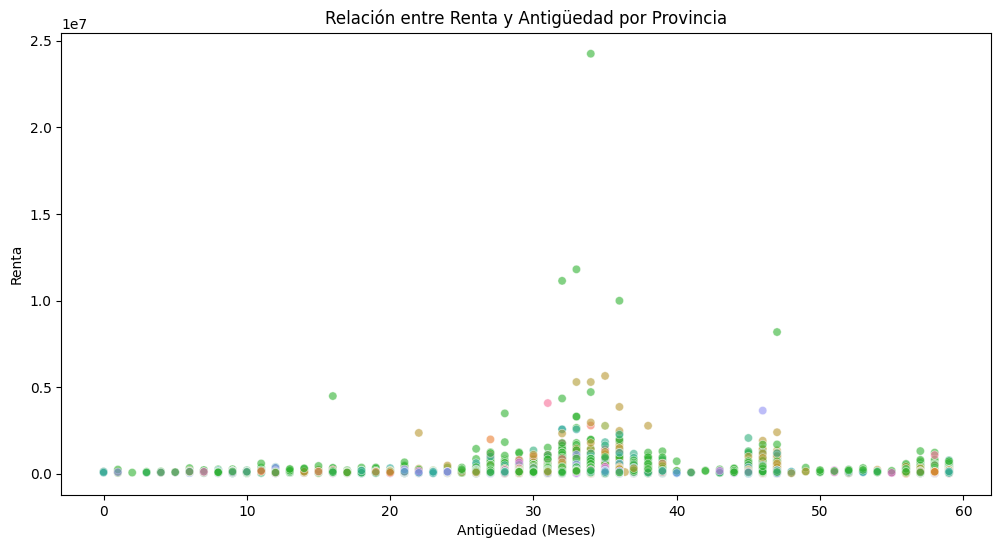

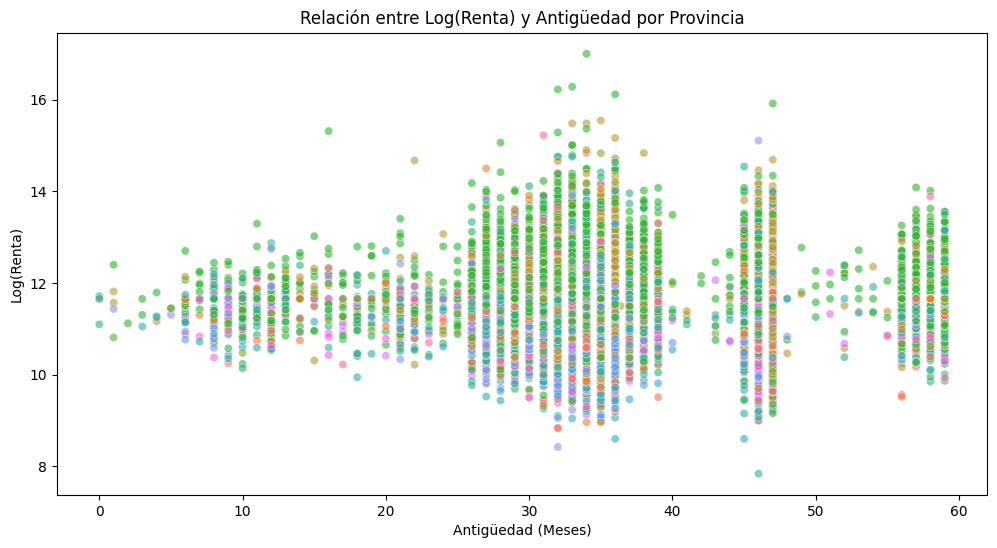

In [23]:
#16. Usando seaborn y las variables “renta” y “antiguedad” realizar un gráfico de dispersión apoyándose en alguna variable categórica (por ejemplo hue=”nomprov”). Después haga lo mismo tomando logaritmos para la renta e interprete los resultados. (sns.scatterplot())
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Asegurar que las columnas necesarias sean numéricas y manejar valores faltantes
df_santander['renta'] = pd.to_numeric(df_santander['renta'], errors='coerce')
df_santander['antiguedad'] = pd.to_numeric(df_santander['antiguedad'], errors='coerce')

# Imputar valores faltantes con la media
df_santander['renta'] = df_santander['renta'].fillna(df_santander['renta'].mean())
df_santander['antiguedad'] = df_santander['antiguedad'].fillna(df_santander['antiguedad'].mean())

# Gráfico de dispersión con "renta" y "antiguedad", categorizando por "nomprov"
plt.figure(figsize=(12, 6))
sns.scatterplot(x='antiguedad', y='renta', hue='nomprov', data=df_santander, alpha=0.6, legend=False)
plt.title('Relación entre Renta y Antigüedad por Provincia')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Renta')
plt.show()

# Aplicar logaritmo a la renta para manejar mejor la escala
df_santander['log_renta'] = np.log1p(df_santander['renta'])  # log(1 + renta) para evitar problemas con ceros

# Gráfico de dispersión con logaritmo de "renta" y "antiguedad"
plt.figure(figsize=(12, 6))
sns.scatterplot(x='antiguedad', y='log_renta', hue='nomprov', data=df_santander, alpha=0.6, legend=False)
plt.title('Relación entre Log(Renta) y Antigüedad por Provincia')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Log(Renta)')
plt.show()


**Interpretación de los resultados**

1. Primer gráfico (Renta vs Antigüedad):
- La renta está dominada por outliers, lo que dificulta identificar tendencias.
- No hay una relación clara entre antigüedad y renta.
2. Segundo gráfico (Log(Renta) vs Antigüedad):
- La escala logarítmica mejora la visualización, mostrando que la mayoría de las rentas están en rangos moderados.
- Clientes con mayor antigüedad tienen una mayor variabilidad en renta, pero no se observa una correlación fuerte.

**Conclusión:** No hay una relación clara entre renta y antigüedad; la variabilidad aumenta con la antigüedad, pero sin un patrón evidente. La transformación logarítmica facilita observar mejor la distribución.

In [24]:
#17. Calcular el intervalo de confianzddrmal o una T-Student.
import scipy.stats as stats
import numpy as np

# Seleccionar la variable de interés (e.g., "renta")
data = df_santander['renta']

# Nivel de confianza
confidence_level = 0.95

# Tamaño de la muestra
n = len(data)

# Media y desviación estándar de la muestra
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # Desviación estándar muestral

# Calcular el error estándar
standard_error = sample_std / np.sqrt(n)

# Obtener el valor crítico de T-Student
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-1)

# Calcular el intervalo de confianza
margin_of_error = t_critical * standard_error
lower_limit = sample_mean - margin_of_error
upper_limit = sample_mean + margin_of_error

# Mostrar resultados
print(f"Intervalo de confianza del {confidence_level*100}% para la renta:")
print(f"Media: {sample_mean:.2f}")
print(f"Intervalo: [{lower_limit:.2f}, {upper_limit:.2f}]")


Intervalo de confianza del 95.0% para la renta:
Media: 115558.90
Intervalo: [114665.75, 116452.04]


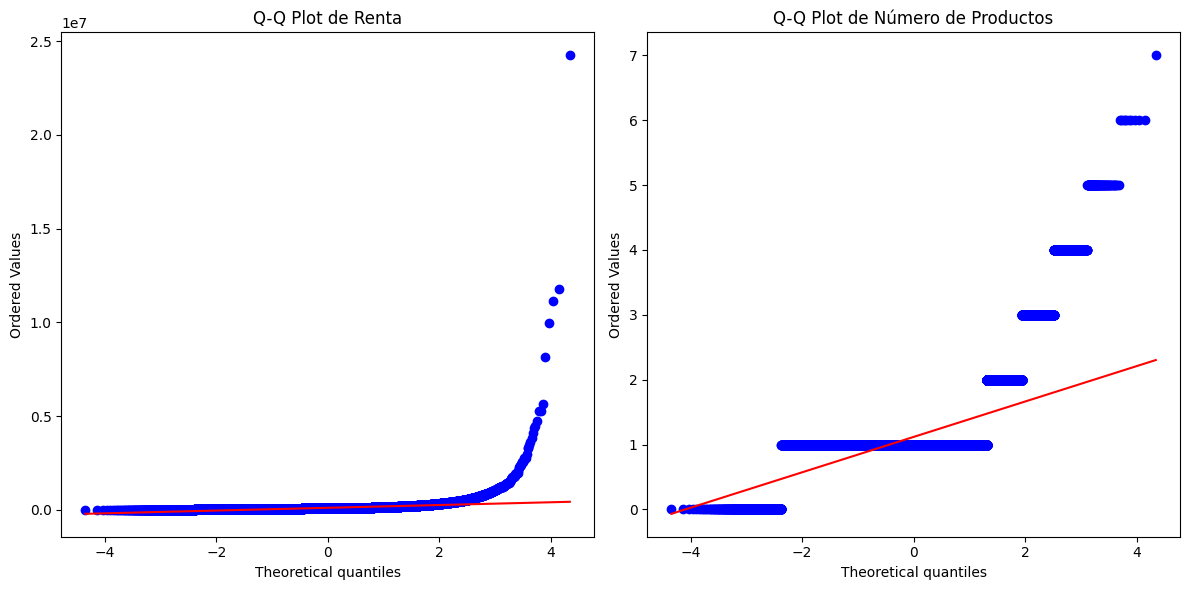

In [25]:
#18. Usando gráficas, ¿qué tipo de distribución siguen las dos variables “renta” y “numero_productos”? ¿Considera que es necesario una transformación de las variables? (probplot())
import scipy.stats as stats
import matplotlib.pyplot as plt

# Crear gráficos de probabilidad (Q-Q plots) para verificar la distribución de las variables
plt.figure(figsize=(12, 6))

# Gráfico de "renta"
plt.subplot(1, 2, 1)
stats.probplot(df_santander['renta'], dist="norm", plot=plt)
plt.title("Q-Q Plot de Renta")

# Gráfico de "numero_productos"
plt.subplot(1, 2, 2)
stats.probplot(df_santander['numero_productos'], dist="norm", plot=plt)
plt.title("Q-Q Plot de Número de Productos")

plt.tight_layout()
plt.show()


**Análisis de los gráficos Q-Q**
1. Q-Q Plot de Renta:
-  Los puntos se desvían significativamente de la línea roja, mostrando una distribución asimétrica (sesgo a la derecha) y afectada por outliers en los valores altos.
-  No sigue una distribución normal, y podría ajustarse mejor a una distribución exponencial o sesgada.

2. Q-Q Plot de Número de Productos:
-  La estructura escalonada refleja su naturaleza discreta (valores enteros).
-  Los valores están concentrados en rangos bajos (0-3), indicando una distribución discreta y asimétrica.

**Conclusión: ¿Es necesaria una transformación?**

**Para renta:**
Sí, una transformación (logaritmo o raíz cuadrada) podría ser útil para reducir el impacto de los outliers y aproximar la normalidad.

**Para número de productos:**
No es estrictamente necesario, ya que es discreta y su transformación depende del análisis específico.

In [26]:
#19. ¿Qué variables piensa que serán más relevantes para los análisis predictivos posteriores?

Las variables más relevantes serán aquellas que reflejan:

1. El perfil demográfico y económico del cliente: age, renta, sexo, segmento.
2. Su relación con el banco: antiguedad, ind_actividad_cliente, ind_nuevo.
3. Su comportamiento de consumo de productos: numero_productos, ind_*_ult1.

Estas variables proporcionan un balance entre características personales, relación con el banco y productos consumidos, lo que las hace ideales para análisis predictivos.

In [27]:
#20. Con los análisis realizados en estos ejercicios y con cualquier otro análisis exploratorio de los datos a través de los gráficos (histograma, correlaciones, covarianzas, gráfico de pastel, boxplot, scatterplot,… ) y variables que considere relevantes, extraiga sus conclusiones sobre esta fase de análisis exploratorio, considerando el objetivo de la competición de predecir qué productos adquirirá después del set de datos.

**Conclusiones de la fase de análisis exploratorio**
1. Perfil del cliente:
  -  Edad y renta son variables clave para identificar patrones de consumo: los adultos con mayores rentas muestran más variabilidad en la adquisición de productos.
  -  Clientes con mayor antigüedad tienden a tener un perfil más diversificado y estable.
2. Relación con el banco:
  -  Número de productos es un fuerte indicador del compromiso del cliente.
  -  Los clientes activos (ind_actividad_cliente) tienen más probabilidades de adquirir nuevos productos.
3. Patrones en productos:
  -  Existe correlación entre algunos productos, indicando que ciertos productos tienden a adquirirse juntos.
  -  Productos básicos como cuentas corrientes y débitos directos son los más frecuentes.
4. Distribuciones y datos:
  -  Renta y número de productos presentan distribuciones asimétricas; transformaciones como logaritmos pueden ser útiles.
  -  Se identificaron outliers que deben tratarse en el modelado.

El análisis revela que variables como age, renta, antiguedad, numero_productos y los indicadores de productos (ind_*_ult1) serán clave para predecir adquisiciones futuras. Los patrones de consumo identificados y las correlaciones entre productos deben guiar los próximos pasos en la modelización.